## Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [7]:
df = pd.read_csv('/kaggle/input/cs114-reg/annonimized.csv')
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [8]:
df = df.rename(columns={
    "concat('it001',`assignment_id`)": "assignment",
    "concat('it001',`problem_id`)": "problem",
    "concat('it001', username)": "user",
    "concat('it001',`language_id`)": "language"
})
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [9]:
row, column = df.shape
print(f"Row: {row}, Column: {column}")

Row: 295198, Column: 11


In [10]:
df.isnull().sum()

assignment     0
problem        0
user           0
is_final       0
status         0
pre_score      0
coefficient    0
language       0
created_at     0
updated_at     0
judgement      0
dtype: int64

In [11]:
df["assignment"].nunique()

203

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

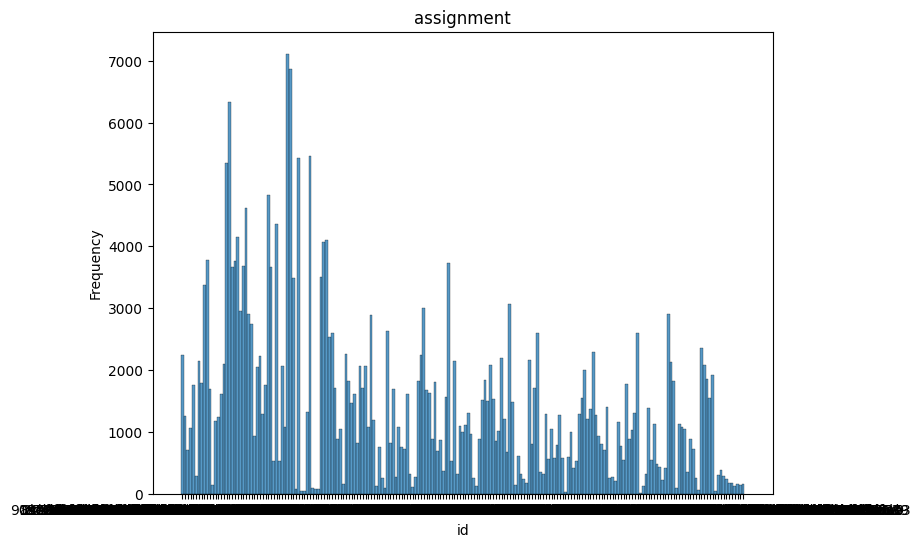

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df["assignment"],bins=10)
plt.title("assignment")
plt.xlabel("id")
plt.ylabel("Frequency")

In [14]:
df["problem"].nunique()

469

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

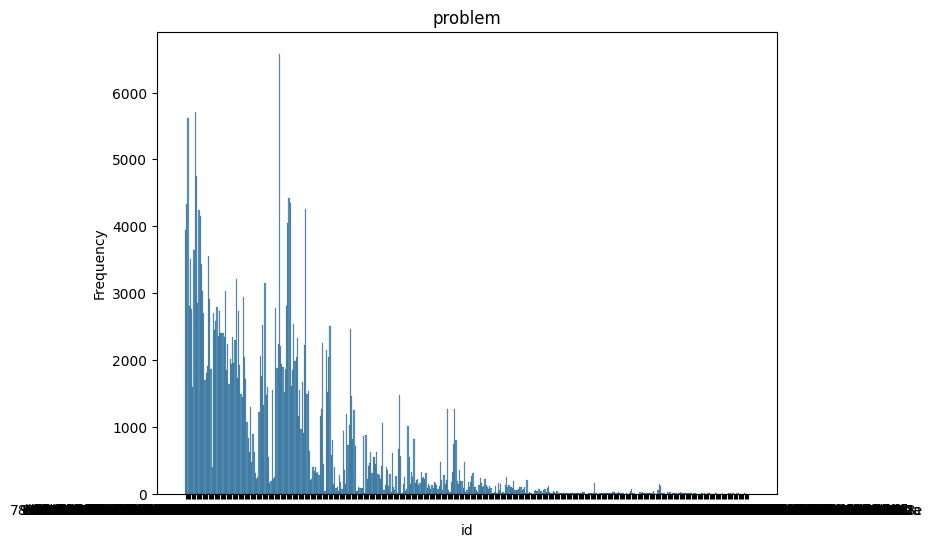

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df["problem"],bins=10)
plt.title("problem")
plt.xlabel("id")
plt.ylabel("Frequency")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

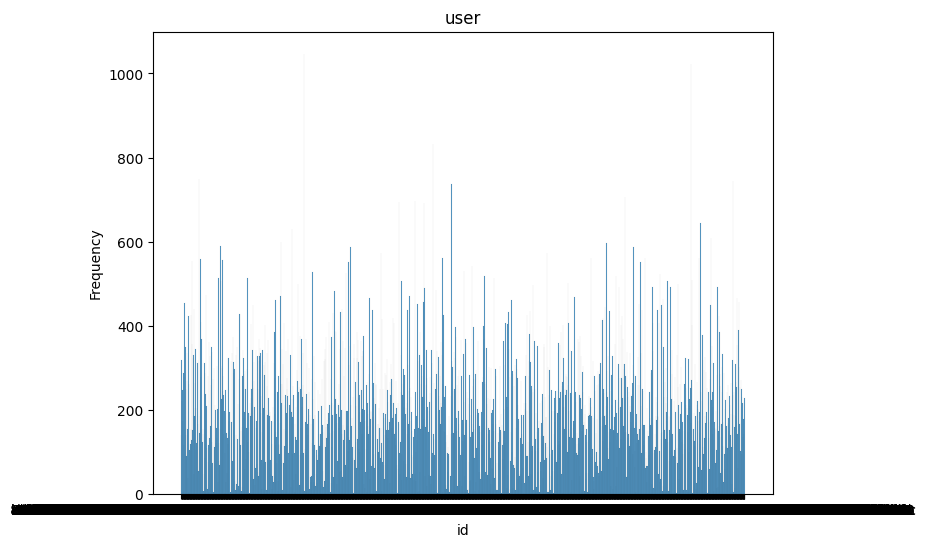

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df["user"],bins=10)
plt.title("user")
plt.xlabel("id")
plt.ylabel("Frequency")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

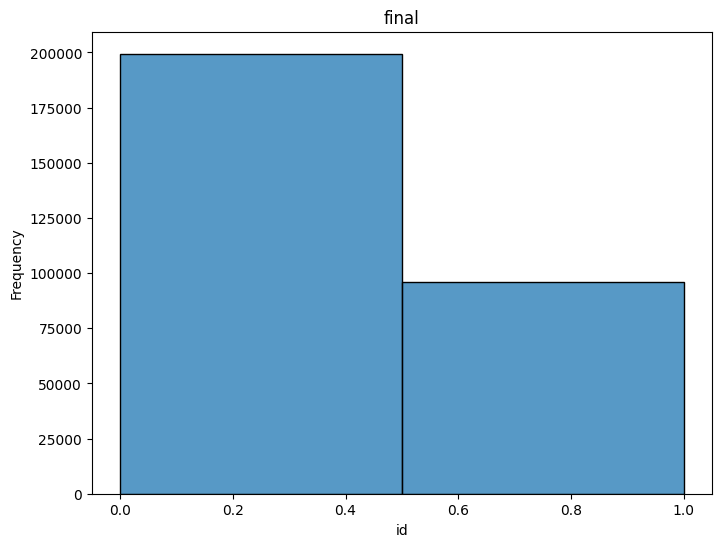

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df["is_final"],bins=2)
plt.title("final")
plt.xlabel("id")
plt.ylabel("Frequency")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

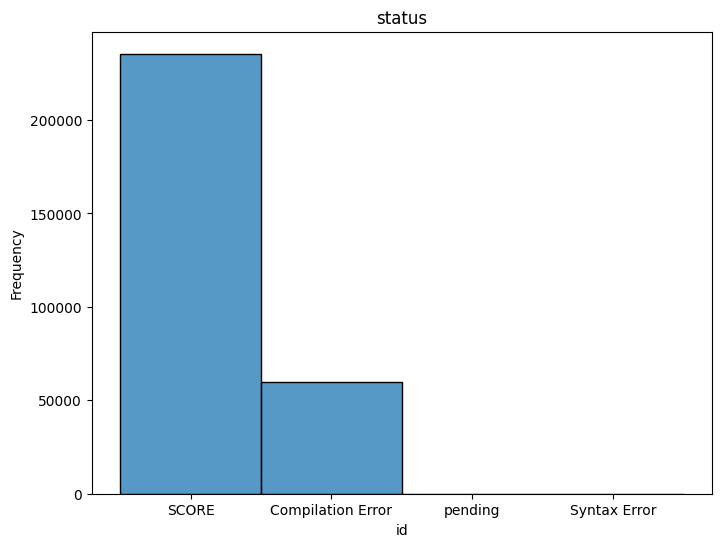

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df["status"],bins=4)
plt.title("status")
plt.xlabel("id")
plt.ylabel("Frequency")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

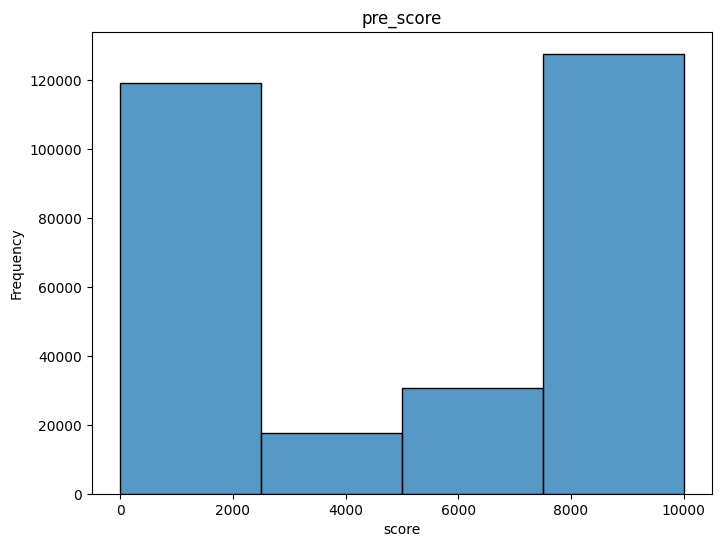

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df["pre_score"],bins=4)
plt.title("pre_score")
plt.xlabel("score")
plt.ylabel("Frequency")

In [24]:
df["language"].nunique()

6

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

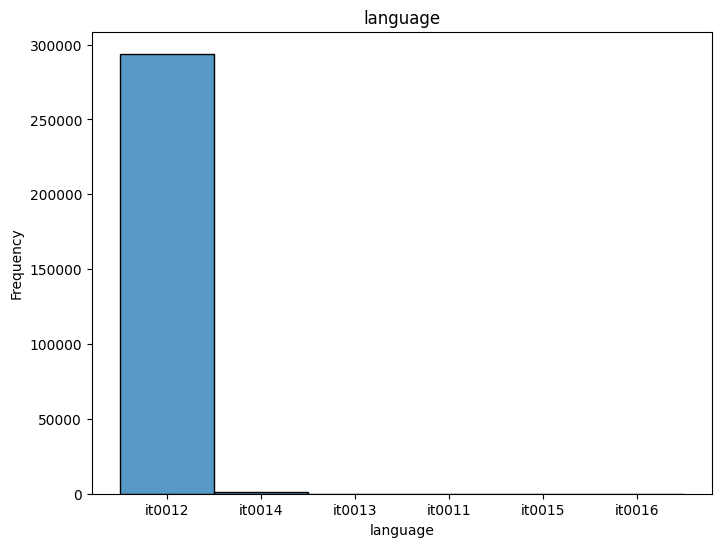

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df["language"],bins=4)
plt.title("language")
plt.xlabel("language")
plt.ylabel("Frequency")

In [ ]:
assignment     0
problem        0
user           0
is_final       0
status         0
pre_score      0
coefficient    0
language       0
created_at     0
updated_at     0
judgement      0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

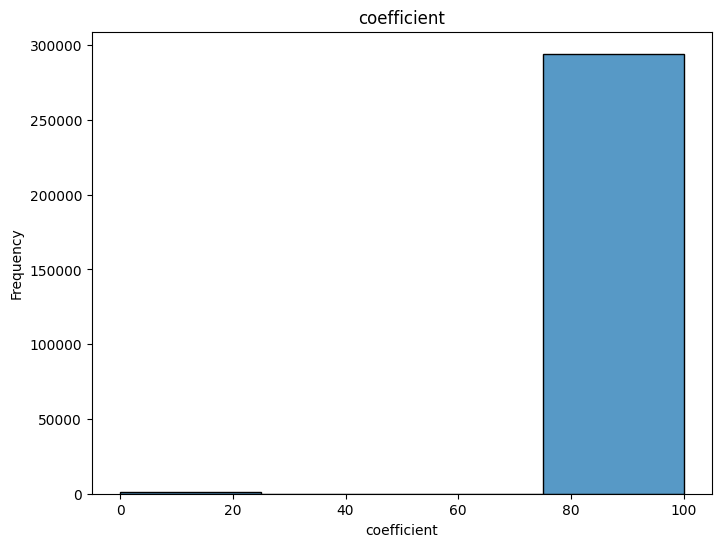

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df["coefficient"],bins=4)
plt.title("coefficient")
plt.xlabel("coefficient")
plt.ylabel("Frequency")

In [11]:
# Load điểm
df_ck = pd.read_csv('/kaggle/input/cs114-reg/ck-public.csv')
df_qt = pd.read_csv('/kaggle/input/cs114-reg/qt-public.csv')
df_th = pd.read_csv('/kaggle/input/cs114-reg/th-public.csv')

# Gộp điểm
df_scores = df_ck.merge(df_qt, on='hash', how='outer', suffixes=('_CK', '_QT'))
df_scores = df_scores.merge(df_th, on='hash', how='outer').rename(columns={'CK': 'CK', 'QT': 'QT', 'TH': 'TH'})

# Gộp vào wecode
df['hash'] = df["concat('it001', username)"]
df_full = df.merge(df_scores, on='hash', how='inner')  # chỉ lấy sinh viên có điểm thật

In [13]:
df_full.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement,hash,CK,diemqt,TH
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5


In [15]:
# Kích thước dataset
row, column = df.shape
print(f"Row: {row}, Column: {column}")

Row: 295198, Column: 12


In [16]:
# Kích thước dataset
row, column = df_full.shape
print(f"Row: {row}, Column: {column}")

Row: 157040, Column: 15


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["concat('it001',`assignment_id`)"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

In [17]:
df_full.isnull().sum()

concat('it001',`assignment_id`)     0
concat('it001',`problem_id`)        0
concat('it001', username)           0
is_final                            0
status                              0
pre_score                           0
coefficient                         0
concat('it001',`language_id`)       0
created_at                          0
updated_at                          0
judgement                           0
hash                                0
CK                                 67
diemqt                             67
TH                                 67
dtype: int64

In [18]:
 df_full = df_full.dropna(subset=['CK',"diemqt","TH"])

In [19]:
df_full.isnull().sum()

concat('it001',`assignment_id`)    0
concat('it001',`problem_id`)       0
concat('it001', username)          0
is_final                           0
status                             0
pre_score                          0
coefficient                        0
concat('it001',`language_id`)      0
created_at                         0
updated_at                         0
judgement                          0
hash                               0
CK                                 0
diemqt                             0
TH                                 0
dtype: int64

## Tạo đặc trưng

In [26]:
## tạo đặc trưng đếm số lần nộp trễ, hơi trễ và đúng giờ
df['submit_late'] = (df['pre_score'] == 0).astype(int)
df['submit_semi_late'] = ((df['pre_score']  > 0) & (df['pre_score']  < 10000)).astype(int)
df['submit_ontime'] = (df['pre_score']  == 10000).astype(int)
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1


In [27]:
## Cột điểm cuối cùng dùng để tính những cột sau này cần thiết như bài tập đó bao nhiêu sinh viên đạt điểm tối đa
df['last_weighted_score'] = df['is_final'].astype(int) * (df['pre_score'] * df['coefficient'] / 10000) 

In [30]:
## Số lần không đúng
df['is_error'] = (df['status'] != 'SCORE').astype(int)
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0


In [31]:
## kiểm tra sinh viên hoàn thành bài đó
df['is_success_submit'] = ((df['is_final'] == 1) & (df['coefficient'] == 100)).astype(int)
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1


In [32]:
## chuẩn hóa thời gian
df['time'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0,0,1900-10-09 08:02:04
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0.0,0,0,1900-10-09 08:04:41
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1,1900-10-09 08:06:49
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1,1900-10-09 08:47:52
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,100.0,0,1,1900-10-09 09:19:35


In [35]:
## tính thời gian làm cho 1 bài
df_start_time = df.groupby(['user', "problem"])['time'].min().reset_index() 
df_end_time = df.groupby(['user', "problem"])['time'].max().reset_index()
df_start_time = df_start_time.rename(columns={'time': 'assignment_start_time'})
df_end_time = df_end_time.rename(columns={'time': 'assignment_end_time'})
 
df = df.merge(df_start_time, on=['user', "problem"], how='left')
df = df.merge(df_end_time, on=['user', "problem"], how='left')
 
df['time_spent_hours'] = (df['assignment_end_time'] - df['assignment_start_time']).dt.total_seconds() / 3600
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,1,0,0,0.0,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,1,0,0,0.0,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,0,1,100.0,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,0,1,100.0,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,0,1,100.0,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000


In [36]:
df['submit_hour'] = df.apply(
    lambda row: row['time'].hour if row['is_success_submit'] == 1 else 25,
    axis=1
)

In [37]:
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours,submit_hour
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,0,0.0,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,0,0.0,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,1,100.0,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,8.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,1,100.0,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000,8.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,1,100.0,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000,9.0


In [40]:
df['submit_weekday'] = df['time'].dt.dayofweek
df.head(n = 5)

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,submit_ontime,last_weighted_score,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours,submit_hour,submit_weekday
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,0.0,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,0.0,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,1,100.0,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,8.0,1.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,1,100.0,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000,8.0,1.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,1,100.0,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000,9.0,1.0


In [45]:
df['num_submit_assignment'] = df.groupby(['user', 'assignment'])['user'].transform('count')
df['num_submit_problem'] = df.groupby(['user', 'problem'])['user'].transform('count')

In [46]:
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours,submit_hour,submit_weekday,num_submit_assignment,num_submit_problem
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0,34,3
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0,34,3
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,8.0,1.0,34,3
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000,8.0,1.0,34,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000,9.0,1.0,34,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   assignment             295198 non-null  object        
 1   problem                295198 non-null  object        
 2   user                   295198 non-null  object        
 3   is_final               295198 non-null  int64         
 4   status                 295198 non-null  object        
 5   pre_score              295198 non-null  int64         
 6   coefficient            295198 non-null  int64         
 7   language               295198 non-null  object        
 8   created_at             295198 non-null  object        
 9   updated_at             295198 non-null  object        
 10  judgement              295198 non-null  object        
 11  submit_late            295198 non-null  int64         
 12  submit_semi_late       295198 non-null  int6

In [48]:
df_features = df.copy()
df_features.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours,submit_hour,submit_weekday,num_submit_assignment,num_submit_problem
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0,34,3
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,1.0,34,3
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,8.0,1.0,34,3
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000,8.0,1.0,34,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000,9.0,1.0,34,1


In [52]:
df_features = df.groupby('user').size().reset_index(name='total_submissions')
df_features.head()

,user,total_submissions
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100
4,013de369c439ab0ead8aa7da64423aa395a8be39,107


In [53]:
df_success_submit_count = df.groupby('user')['is_success_submit'].sum().reset_index()
df_success_submit_count.columns = ['user', 'num_success_submit']
df_features = df_features.merge(df_success_submit_count, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64


In [55]:
df_submit_types = df.groupby('user')[[
    'submit_late',
    'submit_semi_late',
    'submit_ontime'
]].sum().reset_index()

df_submit_types = df_submit_types.rename(columns={
    'submit_late': 'num_submit_late',
    'submit_semi_late': 'num_submit_semi_late',
    'submit_ontime': 'num_submit_ontime'
})
df_features = df_features.merge(df_submit_types, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59


In [57]:
df_avg_last_score = df.groupby('user')['last_weighted_score'].mean().reset_index()
df_avg_last_score.columns = ['user', 'avg_last_weighted_score']
df_features = df_features.merge(df_avg_last_score, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187


In [58]:
df_error_count = df.groupby('user')['is_error'].sum().reset_index()
df_error_count.columns = ['user', 'num_error_submissions']
df_features = df_features.merge(df_error_count, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000,24
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13


In [60]:
 
df_weekday_counts = df.groupby(['user', 'submit_weekday']).size().unstack(fill_value=0).reset_index()
df_weekday_counts.columns = ['user'] + [f'num_submit_weekday_{i}' for i in range(7)]
weekday_map = {
    0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'
}
df_weekday_counts.rename(columns={i: f'num_submit_{name}' for i, name in weekday_map.items()}, inplace=True)
df_features = df_features.merge(df_weekday_counts, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,31,84,10,10,3
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,56,115,14,7,2
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,18,30,37,19,26
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000,24,2,15,16,35,11,11,10
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,0,29,10,0,0


In [62]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     1489 non-null   object 
 1   total_submissions        1489 non-null   int64  
 2   num_success_submit       1489 non-null   int64  
 3   num_submit_late          1489 non-null   int64  
 4   num_submit_semi_late     1489 non-null   int64  
 5   num_submit_ontime        1489 non-null   int64  
 6   avg_last_weighted_score  1489 non-null   float64
 7   num_error_submissions    1489 non-null   int64  
 8   num_submit_weekday_0     1489 non-null   int64  
 9   num_submit_weekday_1     1489 non-null   int64  
 10  num_submit_weekday_2     1489 non-null   int64  
 11  num_submit_weekday_3     1489 non-null   int64  
 12  num_submit_weekday_4     1489 non-null   int64  
 13  num_submit_weekday_5     1489 non-null   int64  
 14  num_submit_weekday_6    

In [65]:
df_ck = pd.read_csv('/kaggle/input/cs114-reg/ck-public.csv')
df_qt = pd.read_csv('/kaggle/input/cs114-reg/qt-public.csv')
df_th = pd.read_csv('/kaggle/input/cs114-reg/th-public.csv')

df_scores = df_ck.merge(df_qt, on='hash', how='outer', suffixes=('_CK', '_QT'))
df_scores = df_scores.merge(df_th, on='hash', how='outer')
df_scores.head()


,hash,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6


In [69]:
df_scores = df_scores.rename(columns={
    'hash': 'user',
})

In [70]:
data = df_features.copy()
data = data.merge(df_scores, on='user', how='inner')

In [71]:
data.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,31,84,10,10,3,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,56,115,14,7,2,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,18,30,37,19,26,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,0,29,10,0,0,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,83,37,79,40.000000,45,47,7,21,33,45,30,16,4.0,9,6


In [72]:
df_f_raw = data.copy()

In [74]:
df_f_raw= df_f_raw.dropna()

In [77]:
df_f_raw.columns

Index(['user', 'total_submissions', 'num_success_submit', 'num_submit_late',
       'num_submit_semi_late', 'num_submit_ontime', 'avg_last_weighted_score',
       'num_error_submissions', 'num_submit_weekday_0', 'num_submit_weekday_1',
       'num_submit_weekday_2', 'num_submit_weekday_3', 'num_submit_weekday_4',
       'num_submit_weekday_5', 'num_submit_weekday_6', 'CK', 'diemqt', 'TH'],
      dtype='object')

In [78]:
cols_to_scale = [
    'total_submissions', 'num_success_submit', 'num_submit_late',
       'num_submit_semi_late', 'num_submit_ontime', 'avg_last_weighted_score',
       'num_error_submissions', 'num_submit_weekday_0', 'num_submit_weekday_1',
       'num_submit_weekday_2', 'num_submit_weekday_3', 'num_submit_weekday_4',
       'num_submit_weekday_5', 'num_submit_weekday_6'
]


In [79]:
df_f_raw.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,31,84,10,10,3,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,56,115,14,7,2,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,18,30,37,19,26,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,0,29,10,0,0,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,83,37,79,40.000000,45,47,7,21,33,45,30,16,4.0,9,6


In [81]:
df_f_raw['diemqt'] = df_f_raw['diemqt'].replace('\xa0', 0).astype(float)
df_f_raw['TH'] = df_f_raw['TH'].replace('\xa0', 0).astype(float)

In [82]:
df_f_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     755 non-null    object 
 1   total_submissions        755 non-null    int64  
 2   num_success_submit       755 non-null    int64  
 3   num_submit_late          755 non-null    int64  
 4   num_submit_semi_late     755 non-null    int64  
 5   num_submit_ontime        755 non-null    int64  
 6   avg_last_weighted_score  755 non-null    float64
 7   num_error_submissions    755 non-null    int64  
 8   num_submit_weekday_0     755 non-null    int64  
 9   num_submit_weekday_1     755 non-null    int64  
 10  num_submit_weekday_2     755 non-null    int64  
 11  num_submit_weekday_3     755 non-null    int64  
 12  num_submit_weekday_4     755 non-null    int64  
 13  num_submit_weekday_5     755 non-null    int64  
 14  num_submit_weekday_6     755 no

In [99]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
df = df_f_raw.dropna()

X = df.drop(columns=['user', 'CK', 'diemqt', 'TH'])
y = df['diemqt']  
 
# X_cat = X[['final_period_encoded']]
#X_num = X.drop(columns=['final_period_encoded'])

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X)
#X_processed = np.hstack([X_num_scaled, X_cat.values])

 
X_train, X_test, y_train, y_test = train_test_split(
   X_num_scaled, y, test_size=0.2, random_state=42
)
 
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1488
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 14
[LightGBM] [Info] Start training from score 8.252483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b